Fuzzified Input:
       Parameter  Kategori  Degree of Membership
0   Jumlah Tugas   sedikit                   0.0
1   Jumlah Tugas    sedang                   0.0
2   Jumlah Tugas    banyak                   0.6
3  Waktu Belajar  sebentar                   0.0
4  Waktu Belajar     cukup                   0.0
5  Waktu Belajar      lama                   0.6
6    Waktu Tidur    kurang                   0.2
7    Waktu Tidur     cukup                   0.0
8    Waktu Tidur     lebih                   0.0

Hasil Penerapan Aturan:
  Kategori Stres  Degree of Membership
0         rendah                   0.0
1         sedang                   0.0
2         tinggi                   0.2


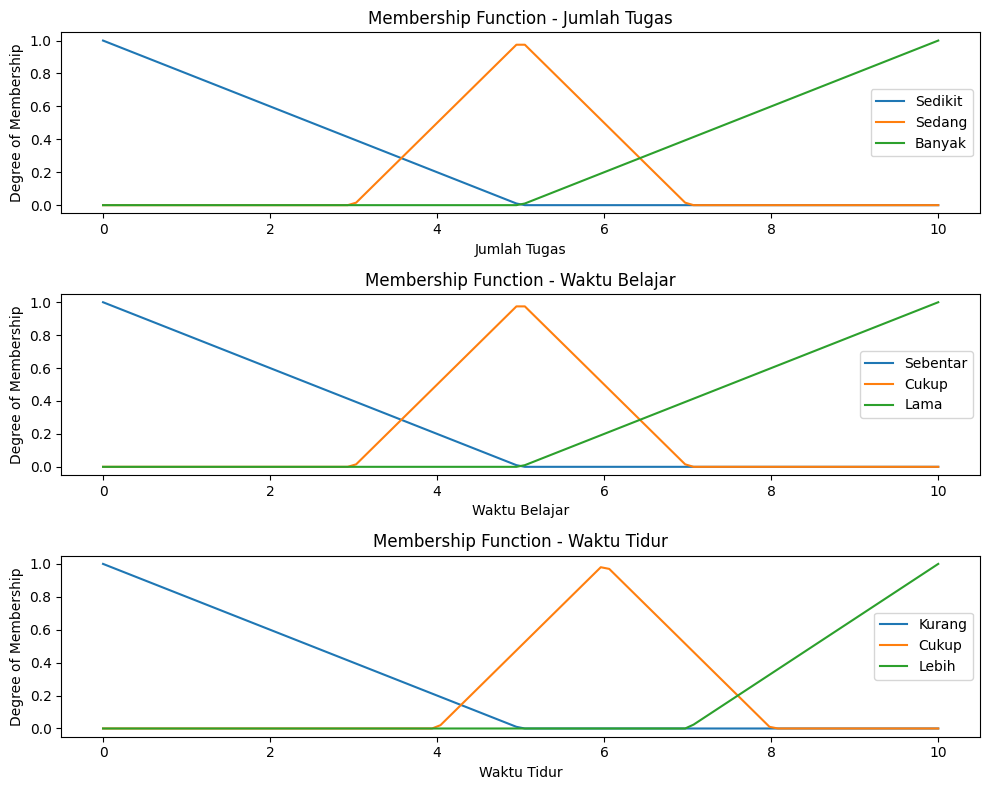

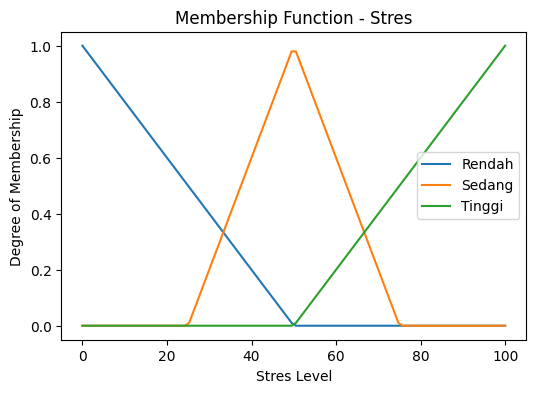

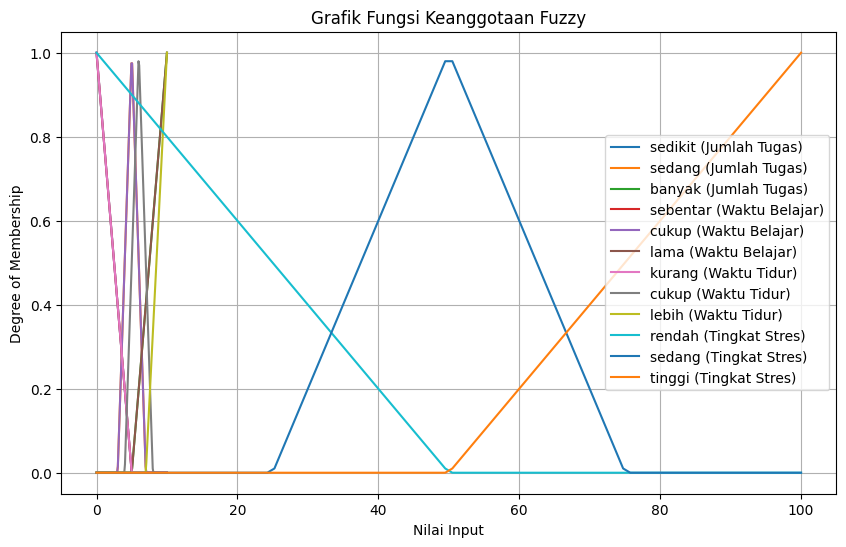

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi Keanggotaan Segitiga dengan penanganan pembagian dengan nol
def triangular(x, a, b, c):
    if x < a or x > c:
        return 0  # Nilai keanggotaan 0 di luar rentang
    elif a <= x < b:
        return (x - a) / (b - a) if b != a else 1  # Hindari pembagian dengan nol
    elif b <= x <= c:
        return (c - x) / (c - b) if c != b else 1  # Hindari pembagian dengan nol
    return 0

# Fungsi Fuzzifikasi Input
def fuzzify_input(value, membership_functions):
    return {key: mf(value) for key, mf in membership_functions.items()}

# Membership Functions untuk inputs dan outputs
jumlah_tugas_mf = {
    'sedikit': lambda x: triangular(x, 0, 0, 5),
    'sedang': lambda x: triangular(x, 3, 5, 7),
    'banyak': lambda x: triangular(x, 5, 10, 10)
}

waktu_belajar_mf = {
    'sebentar': lambda x: triangular(x, 0, 0, 5),
    'cukup': lambda x: triangular(x, 3, 5, 7),
    'lama': lambda x: triangular(x, 5, 10, 10)
}

waktu_tidur_mf = {
    'kurang': lambda x: triangular(x, 0, 0, 5),
    'cukup': lambda x: triangular(x, 4, 6, 8),
    'lebih': lambda x: triangular(x, 7, 10, 10)
}

# Fungsi Fuzzifikasi untuk Stres
stres_mf = {
    'rendah': lambda x: triangular(x, 0, 0, 50),
    'sedang': lambda x: triangular(x, 25, 50, 75),
    'tinggi': lambda x: triangular(x, 50, 100, 100)
}

# Aturan fuzzy
def apply_rules(jumlah_tugas, waktu_belajar, waktu_tidur):
    output = {'rendah': 0, 'sedang': 0, 'tinggi': 0}

    # Contoh aturan
    output['rendah'] = max(output['rendah'], min(jumlah_tugas['sedikit'], waktu_belajar['sebentar'], waktu_tidur['cukup']))
    output['sedang'] = max(output['sedang'], min(jumlah_tugas['sedang'], waktu_belajar['cukup'], waktu_tidur['kurang']))
    output['tinggi'] = max(output['tinggi'], min(jumlah_tugas['banyak'], waktu_belajar['lama'], waktu_tidur['kurang']))

    return output

# Input nilai
jumlah_tugas_value = 8
waktu_belajar_value = 8
waktu_tidur_value = 4

# Fuzzify inputs
jumlah_tugas_fuzzy = fuzzify_input(jumlah_tugas_value, jumlah_tugas_mf)
waktu_belajar_fuzzy = fuzzify_input(waktu_belajar_value, waktu_belajar_mf)
waktu_tidur_fuzzy = fuzzify_input(waktu_tidur_value, waktu_tidur_mf)

# Membuat tabel untuk hasil fuzzifikasi input
fuzzified_input_data = {
    'Parameter': ['Jumlah Tugas', 'Jumlah Tugas', 'Jumlah Tugas', 
                  'Waktu Belajar', 'Waktu Belajar', 'Waktu Belajar', 
                  'Waktu Tidur', 'Waktu Tidur', 'Waktu Tidur'],
    'Kategori': ['sedikit', 'sedang', 'banyak', 
                 'sebentar', 'cukup', 'lama', 
                 'kurang', 'cukup', 'lebih'],
    'Degree of Membership': [
        jumlah_tugas_fuzzy['sedikit'], jumlah_tugas_fuzzy['sedang'], jumlah_tugas_fuzzy['banyak'],
        waktu_belajar_fuzzy['sebentar'], waktu_belajar_fuzzy['cukup'], waktu_belajar_fuzzy['lama'],
        waktu_tidur_fuzzy['kurang'], waktu_tidur_fuzzy['cukup'], waktu_tidur_fuzzy['lebih']
    ]
}

fuzzified_input_df = pd.DataFrame(fuzzified_input_data)

# Terapkan aturan
stres_output_fuzzy = apply_rules(jumlah_tugas_fuzzy, waktu_belajar_fuzzy, waktu_tidur_fuzzy)

# Membuat tabel untuk hasil penerapan aturan
output_data = {
    'Kategori Stres': ['rendah', 'sedang', 'tinggi'],
    'Degree of Membership': [
        stres_output_fuzzy['rendah'],
        stres_output_fuzzy['sedang'],
        stres_output_fuzzy['tinggi']
    ]
}

output_df = pd.DataFrame(output_data)

# Menampilkan tabel hasil fuzzifikasi input
print("Fuzzified Input:")
print(fuzzified_input_df)

# Menampilkan tabel hasil penerapan aturan
print("\nHasil Penerapan Aturan:")
print(output_df)

# Plot membership functions for inputs and outputs
def plot_membership_functions():
    x = np.linspace(0, 10, 100)
    stress_x = np.linspace(0, 100, 100)

    plt.figure(figsize=(10, 8))

    # Plot jumlah_tugas
    plt.subplot(3, 1, 1)
    plt.plot(x, [jumlah_tugas_mf['sedikit'](v) for v in x], label='Sedikit')
    plt.plot(x, [jumlah_tugas_mf['sedang'](v) for v in x], label='Sedang')
    plt.plot(x, [jumlah_tugas_mf['banyak'](v) for v in x], label='Banyak')
    plt.title('Membership Function - Jumlah Tugas')
    plt.xlabel('Jumlah Tugas')
    plt.ylabel('Degree of Membership')
    plt.legend()

    # Plot waktu_belajar
    plt.subplot(3, 1, 2)
    plt.plot(x, [waktu_belajar_mf['sebentar'](v) for v in x], label='Sebentar')
    plt.plot(x, [waktu_belajar_mf['cukup'](v) for v in x], label='Cukup')
    plt.plot(x, [waktu_belajar_mf['lama'](v) for v in x], label='Lama')
    plt.title('Membership Function - Waktu Belajar')
    plt.xlabel('Waktu Belajar')
    plt.ylabel('Degree of Membership')
    plt.legend()

    # Plot waktu_tidur
    plt.subplot(3, 1, 3)
    plt.plot(x, [waktu_tidur_mf['kurang'](v) for v in x], label='Kurang')
    plt.plot(x, [waktu_tidur_mf['cukup'](v) for v in x], label='Cukup')
    plt.plot(x, [waktu_tidur_mf['lebih'](v) for v in x], label='Lebih')
    plt.title('Membership Function - Waktu Tidur')
    plt.xlabel('Waktu Tidur')
    plt.ylabel('Degree of Membership')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot stres
    plt.figure(figsize=(6, 4))
    plt.plot(stress_x, [stres_mf['rendah'](v) for v in stress_x], label='Rendah')
    plt.plot(stress_x, [stres_mf['sedang'](v) for v in stress_x], label='Sedang')
    plt.plot(stress_x, [stres_mf['tinggi'](v) for v in stress_x], label='Tinggi')
    plt.title('Membership Function - Stres')
    plt.xlabel('Stres Level')
    plt.ylabel('Degree of Membership')
    plt.legend()

    plt.show()

# Call the function to plot
plot_membership_functions()
# Fungsi untuk plot fungsi keanggotaan
def plot_membership(x_values, mf_dict, label):
    for key, mf in mf_dict.items():
        plt.plot(x_values, [mf(x) for x in x_values], label=f"{key} ({label})")

# Plot fungsi keanggotaan
plt.figure(figsize=(10, 6))

# Plot untuk Jumlah Tugas
plot_membership(np.linspace(0, 10, 100), jumlah_tugas_mf, 'Jumlah Tugas')

# Plot untuk Waktu Belajar
plot_membership(np.linspace(0, 10, 100), waktu_belajar_mf, 'Waktu Belajar')

# Plot untuk Waktu Tidur
plot_membership(np.linspace(0, 10, 100), waktu_tidur_mf, 'Waktu Tidur')

# Plot untuk Tingkat Stres
plot_membership(np.linspace(0, 100, 100), stres_mf, 'Tingkat Stres')

# Set title, labels, and legend
plt.title("Grafik Fungsi Keanggotaan Fuzzy")
plt.xlabel("Nilai Input")
plt.ylabel("Degree of Membership")
plt.legend()
plt.grid(True)
plt.show()
